In [1]:
%config Completer.use_jedi = False

In [2]:
import os
import pandas as pd
from pathlib import Path
import georasters as gr
import datetime
import numpy as np
from pathlib import Path
import re
import tensorflow as tf
from osgeo import gdal
import matplotlib.pyplot as plt

In [22]:
directory_in_str = "/opt/wrfdatos/GFS025/" #dentro de ....
pathlist = Path(directory_in_str).glob('2020_0*/*/*.grib2')

horarios = ['+006', '+009', '+012', '+015']
lista_de_path = list()

for path in pathlist:
    path_in_str = str(path)
    if(path_in_str[49:53] in horarios):
        lista_de_path.append(path_in_str)

In [29]:
len(lista_de_path)

2208

In [30]:
X = np.zeros((2208, 3, 261, 325))
j=0
for i in lista_de_path:
    grib = gdal.Open(i)
    
    band500 = grib.GetRasterBand(99)
    band700 = grib.GetRasterBand(119)
    band1000 = grib.GetRasterBand(163)

    data500 = band500.ReadAsArray()
    data700 = band700.ReadAsArray()
    data1000 = band1000.ReadAsArray()
    
    X[j,0,:,:] = data1000
    X[j,1,:,:] = data700
    X[j,2,:,:] = data500
    
    j = j+1

In [4]:
X = np.load('../x_grib.npy')
print(X.shape)

(2208, 3, 261, 325)


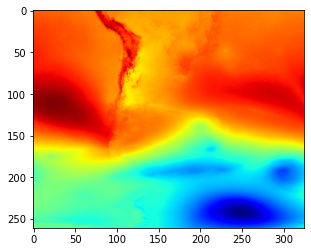

In [5]:
plt.imshow(X[150,0,:,:], cmap='jet')

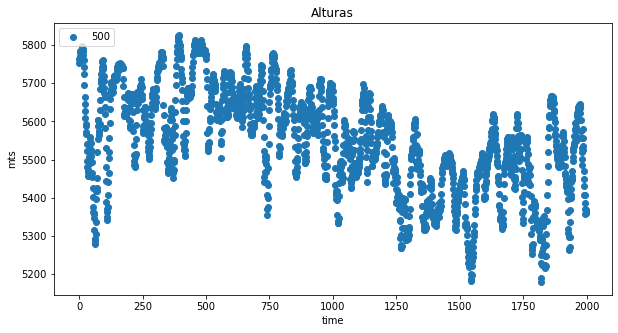

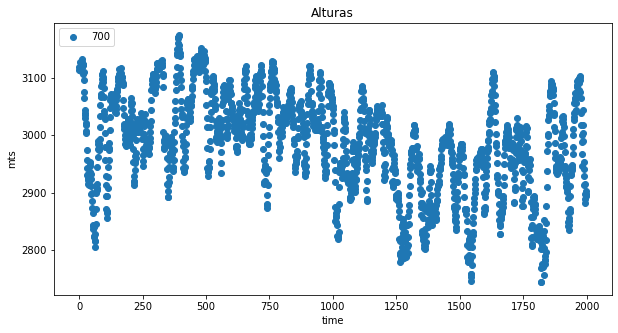

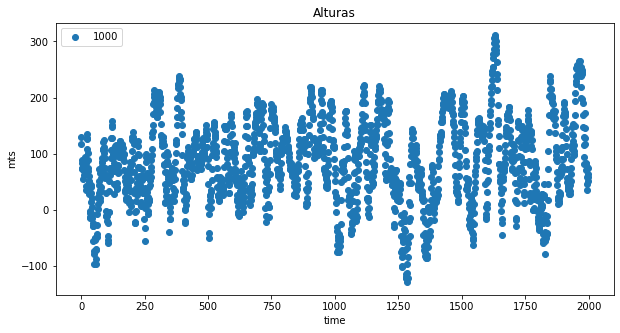

In [10]:
px = 140
py = 120
plt.figure(figsize=(10,5))
plt.plot(X[0:2000,2,px,py], 'o')
plt.title('Alturas')
plt.ylabel('mts')
plt.xlabel('time')
plt.legend(['500'], loc='upper left')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(X[0:2000,1,px,py], 'o')
plt.title('Alturas')
plt.ylabel('mts')
plt.xlabel('time')
plt.legend(['700'], loc='upper left')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(X[0:2000,0,px,py], 'o')
plt.title('Alturas')
plt.ylabel('mts')
plt.xlabel('time')
plt.legend(['1000'], loc='upper left')
plt.show()

In [47]:
np.save('../x_grib.npy', X)